# MSiA 422 Homework 3 -- Written by Parth Patel

## <font color='blue'> Report Table of Conents:
### <font color='orange'> i) Exercise 1 -- Web API
####    a) Pull one month of historical weather data for 50 locations via an API<br>b) Data summary table of max, min, and mean values of the temperature during that monthfor each location<br>c) Visualizaiton for comparison of temperature across the 50 locations<br>c.2)Pandas Implentation<br>d) Same code but utilizing threading<br>e) Exeuction time comparison of w/o threading and w/threading
### <font color='orange'> ii) Exercise 2 -- Web Scraping
####    a) Scraping data utilizing beautifulsoup<br>b) Class defintion<br>c) Extract the data set as defined in the assignment<br>d) Plotting number of entries per state

### Package Imports

In [48]:
import requests #used for calling API
import json #used for parsing API call
import pickle # not used in main code -- but API output was pickled during development as API limited to 500 calls per day
import pandas as pd ##### NOT USED TO SOLVE THE ASSIGNMENT; USED TO SHOW BETTER IMPLEMENTATION
import matplotlib.pyplot as plt #used for visualization of results
import matplotlib #used for modifiying plot axes
from itertools import groupby #used for dictionary aggregation operation
from bs4 import BeautifulSoup, NavigableString, Tag #used for web scrapping and post processing

## <font color='magenta'>Exercise 1 -- Web API

### a) Pull historical temperature data from API

In [5]:
def get_data(city):
    '''
    inputs: city name or other location identifier such as state or country
    outputs: temperature data for the provided location between 07/01/19-07/31/19
    '''
    base_url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'
    params = {
    "q":city,
    "date":"2019-07-01",
    "enddate":"2019-07-31",
    "tp":24,
    "key":'565b3fa2a99d45d7967190401191010',
    "format":'json'
    }
    
    r = requests.get(base_url, params=params)
    resp_dict = r.json()
    df = pd.DataFrame(resp_dict['data']['weather'])
    dict_tmp = resp_dict['data']['weather']
    dict_out=[dict(item, **{'location':city}) for item in dict_tmp]
    df['location'] = city
    return df, dict_out


In [6]:
# 50 randomly selected locations of interest
locations = ['Tokyo','London','New York','Delhi','Shanghai','Mexico City', 'Karachi','Istanbul','Moscow','Paris','Bangalore','Seoul','Venice','Rome','Madrid','Cardiff','Toronto','Sydney','Berlin','Athens','Los Angeles','Seattle','Miami','Dubai','Hiroshima','Brussels','Budapest','Glasgow','Phoenix','Houston','Pittsburgh','New Orleans','Copenhagen','Zurich','Denver','Vancouver','Belfast','Lima','Santiago','Cairo','Nairobi','Panama City','Jakarta','Taipei','Bangkok','Auckland','Melbourne','Tijuana','Beijing','Kyoto','Chicago']

#### Call the get_data function 50 times for each location of interest--save results as both a dictionary of dictionaries and a list of dictionaries

In [7]:
frames = {}
list_of_dict = []
for loc in locations:
    dfout,dictout =  get_data(loc)
    frames['df_{}'.format(loc)] = dfout
    list_of_dict.append(dictout)

### b) Data summary table of max, min, and mean values of the temperature during that monthfor each location

#### Manual Development of a Data Table.....

In [9]:
#Reduced the API output to just the information desired

newlist = []
your_keys = ['date','location','avgtempF','maxtempF','mintempF']

for i in range(len(list_of_dict)):
    for j in range(len(list_of_dict[i])):
        dict_you_want = {your_key: list_of_dict[i][j][your_key] for your_key in your_keys}
        newlist.append(dict_you_want)

In [15]:
#convert temperature string values to numeric
numeric_keys = ['avgtempF','maxtempF','mintempF']
for dicts in newlist: 
    for keys in numeric_keys: 
        dicts[keys] = float(dicts[keys])

In [16]:
#Aggregate the monthly data (e.g. get max and min temp values over the entire 30 day span and get mean of average temperatures across the 30 days)
grouped_list = []
import statistics as stats
for k,v in groupby(newlist,key=lambda x:x['location']):
    grouplist = list(v)
    grouped_list.append({'location':k,'maxtempF':max(d['maxtempF'] for d in grouplist),'mintempF':min(d['mintempF'] for d in grouplist),'avgtempF':stats.mean(d['avgtempF'] for d in grouplist)})

#### Print out list of dictionaries as the 'Data Table'

In [17]:
grouped_list

[{'location': 'Tokyo',
  'maxtempF': 93.0,
  'mintempF': 59.0,
  'avgtempF': 79.35483870967742},
 {'location': 'London', 'maxtempF': 95.0, 'mintempF': 53.0, 'avgtempF': 71.0},
 {'location': 'New York',
  'maxtempF': 101.0,
  'mintempF': 61.0,
  'avgtempF': 85.7741935483871},
 {'location': 'Delhi',
  'maxtempF': 125.0,
  'mintempF': 78.0,
  'avgtempF': 97.38709677419355},
 {'location': 'Shanghai',
  'maxtempF': 100.0,
  'mintempF': 60.0,
  'avgtempF': 86.58064516129032},
 {'location': 'Mexico City',
  'maxtempF': 85.0,
  'mintempF': 55.0,
  'avgtempF': 69.61290322580645},
 {'location': 'Karachi',
  'maxtempF': 95.0,
  'mintempF': 76.0,
  'avgtempF': 88.25806451612904},
 {'location': 'Istanbul',
  'maxtempF': 89.0,
  'mintempF': 65.0,
  'avgtempF': 79.74193548387096},
 {'location': 'Moscow',
  'maxtempF': 84.0,
  'mintempF': 48.0,
  'avgtempF': 68.06451612903226},
 {'location': 'Paris',
  'maxtempF': 105.0,
  'mintempF': 56.0,
  'avgtempF': 75.7741935483871},
 {'location': 'Bangalore',
 

### c) Visualizaiton for comparison of temperature across the 50 locations

In [18]:
#Pull out temperature values into lists for plotting purposes
max_temps = []
min_temps = []
avg_temps = []
for loc in grouped_list:
    max_temps.append(loc['maxtempF'])
    min_temps.append(loc['mintempF'])
    avg_temps.append(loc['avgtempF'])

In [32]:
#Create 'whiskers' for box plot to be generated
lower_whisk = []
upper_whisk = []
for i in range(len(avg_temps)):
    lower_whisk.append(avg_temps[i]-min_temps[i])
    upper_whisk.append(max_temps[i]-avg_temps[i])

#### create a 'box plot' for temperature comparison

Text(0.5, 1.0, 'Max, Min, and Avg Temp Comparison across 50 Cities through July 2019')

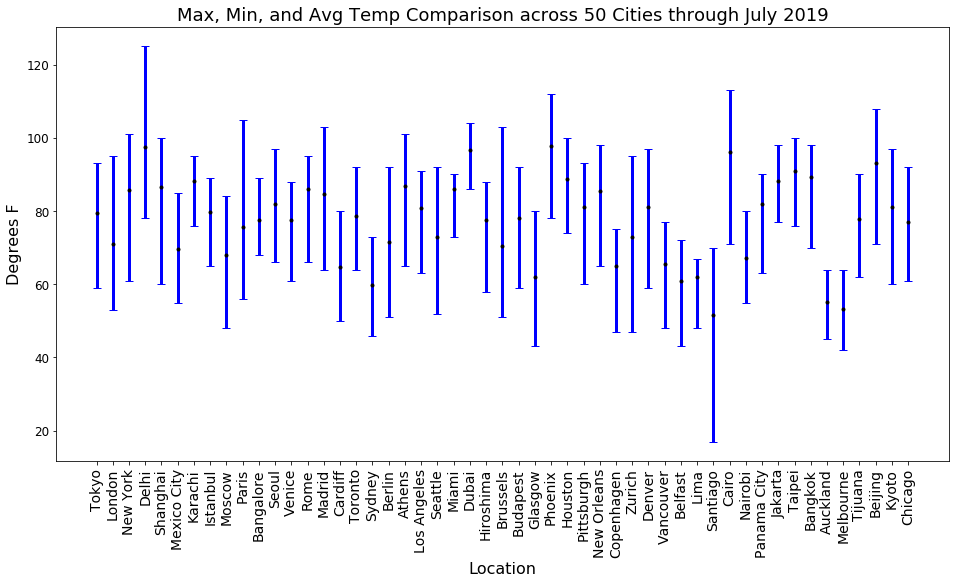

In [34]:
plt.figure(figsize=(16,8))
ind = list(range(len(locations)))
plt.xticks(ind, locations,rotation = 90,fontsize=14)
width = 0.2

plt.errorbar(ind, avg_temps, [lower_whisk,upper_whisk],fmt='.k', capsize=4,ecolor='blue', lw=3)

plt.yticks(fontsize=12)
plt.xlabel('Location', fontsize =16)
plt.ylabel('Degrees F',fontsize = 16)
plt.title('Max, Min, and Avg Temp Comparison across 50 Cities through July 2019', fontsize=18)

### c.2) Pandas Implementation for Data Table and Summaries

In [45]:
df_combined = pd.concat(frames.values(), ignore_index=True)
df_combined['maxtempF'] = pd.to_numeric(df_combined['maxtempF'])
df_combined['mintempF'] = pd.to_numeric(df_combined['mintempF'])
df_combined['avgtempF'] = round(pd.to_numeric(df_combined['avgtempF']),2)
df_grouped = df_combined.groupby('location').agg({'maxtempF':max,'mintempF':'min','avgtempF':'mean'})
df_grouped

,maxtempF,mintempF,avgtempF
location,,,
Athens,101,65,86.967742
Auckland,64,45,55.161290
Bangalore,89,68,77.483871
Bangkok,98,70,89.322581
Beijing,108,71,93.064516
Belfast,72,43,60.774194
Berlin,92,51,71.451613
Brussels,103,51,70.387097
Budapest,92,59,78.193548


Text(0.5, 1.0, 'Max, Min, and Avg Temp Comparison across 50 Cities through July 2019')

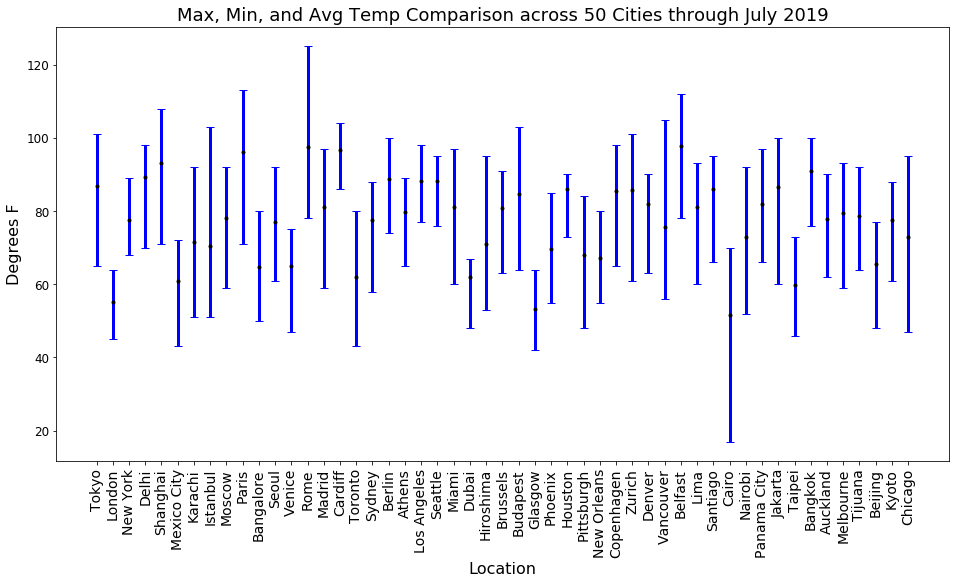

In [47]:
plt.figure(figsize=(16,8))
plt.xticks(range(len(locations)), locations,rotation = 90,fontsize=14)
plt.errorbar(ind, df_grouped['avgtempF'], [df_grouped['avgtempF']-df_grouped['mintempF'],df_grouped['maxtempF']-df_grouped['avgtempF']],
             fmt='.k', capsize=4,ecolor='blue', lw=3)

plt.yticks(fontsize=12)
plt.xlabel('Location', fontsize =16)
plt.ylabel('Degrees F',fontsize = 16)
plt.title('Max, Min, and Avg Temp Comparison across 50 Cities through July 2019', fontsize=18)


### d) Same code from A-C but utilizing threading

### e) Exeuction time comparison of w/o threading and w/threading

## <font color='magenta'>Exercise 2 -- Web Scraping

### a) Scraping data utilizing beautifulsoup

#### Scrap the provided web page

In [51]:
URL = "https://www.summet.com/dmsi/html/codesamples/addresses.html"
r = requests.get(URL) 
  
soup = BeautifulSoup(r.content, "html.parser") 
data = soup.find_all("li")
table = soup.find("table")

In [52]:
#### post processs the scraped data to generate a list of lists containing the desired address info

In [53]:
addr_list=[]
for item in data:
    count = 0
    addr_split = []
    for br in item.findAll('br'):
        next_s = br.nextSibling
        if count == 0:
            prev_s = br.previous_sibling
            addr_split.append(prev_s)
            count+=1
        elif count == 1:
            addr_info = next_s.split()
            for str_item in addr_info:
                addr_split.append(str_item)
            count+=1
        else:
            addr_split.append(next_s)
            addr_list.append(addr_split)
            
        
        

In [55]:
#Viewing the data after processing so far
addr_list

[['Cecilia Chapman', 'Mankato', 'Mississippi', '96522', '(257) 563-7401'],
 ['Iris Watson', 'Frederick', 'Nebraska', '20620', '(372) 587-2335'],
 ['Celeste Slater', 'Roseville', 'NH', '11523', '(786) 713-8616'],
 ['Theodore Lowe', 'Azusa', 'New', 'York', '39531', '(793) 151-6230'],
 ['Calista Wise', 'San', 'Antonio', 'MI', '47096', '(492) 709-6392'],
 ['Kyla Olsen', 'Tamuning', 'PA', '10855', '(654) 393-5734'],
 ['Forrest Ray', 'Corona', 'New', 'Mexico', '08219', '(404) 960-3807'],
 ['Hiroko Potter', 'Muskegon', 'KY', '12482', '(314) 244-6306'],
 ['Nyssa Vazquez', 'Chelsea', 'MI', '67708', '(947) 278-5929'],
 ['Lawrence Moreno', 'Santa', 'Rosa', 'MN', '98804', '(684) 579-1879'],
 ['Ina Moran', 'Lebanon', 'KY', '69409', '(389) 737-2852'],
 ['Aaron Hawkins', 'Erie', 'Rhode', 'Island', '24975', '(660) 663-4518'],
 ['Hedy Greene', 'Latrobe', 'DE', '38100', '(608) 265-2215'],
 ['Melvin Porter', 'Bandera', 'South', 'Dakota', '45149', '(959) 119-8364'],
 ['Keefe Sellers', 'Woodruff', 'SC', '4

### b) Class defintion

In [56]:
class Person():
    '''
    class generated to serve as an address book for the scraped data
    
    class attributes:
    last_name: last name of individual
    first_name: first name of individual
    city: city of residence
    state: state of residence
    zip: zip code of residence
    tele: phone number of the individual
    
    class methoods:
    getters:
    name,city,state,phone,zip -- methods created to retrieve instance attributes
    
    setters:
    set_state: update the instance attribute state; required arg is the string representing the new state for the instance
    
    other:
    get_full_info: returns all the attributes for a given instance in a defined format to satisfy homework req
    '''
    def __init__(self,lname,fname,cty,st,zpcd,tele):
        self.last_name = lname
        self.first_name = fname
        self.city = cty
        self.state = st
        self.zip = zpcd
        self.phone = tele

    
    def get_name(self):
        return(self.last_name, self.first_name)
    
    def get_city(self):
        return(self.city)
    
    def get_state(self):
        return(self.state)
    
    def get_phone(self):
        return(self.phone)
    
    def get_zip(self):
        return(self.zip)
    
    def set_state(self,x):
        self.state = x
        
    
    def get_full_info(self):
        print('Last Name:', self.get_name()[0]+',','First Name:', self.get_name()[1])
        print('City:', self.get_city()+",",'State:', self.get_state()+",",'Zip:', self.get_zip())
        print('Phone', self.get_phone())
        print('\n')

### c) Extract the data set as defined in the instructions

#### Data cleaning
Some cities and states have spaces in their name that was not originally accounted for thus this process cleans that up
After any required cleaning each line in the scrapped data is converted to an instance of the class Person

In [58]:
objs = []
for j in addr_list:
    names = j[0].split()
    lname = names[1]
    fname = names[0]
    zpcd = j[-2]
    phn = j[-1]
    cty = j[1]
    ste = j[-3]
    
    if len(j) < 5: 
        cty = j[1]
        ste = j[2]
    else:
        if j[1] in ('New','San','Santa','Miami','Rolling','Green','Idaho','Villa','Lake','Walla','Asbury','Pass','Grand','Fort','South','Yorba','Bell','West','Rocky') :
            cty = j[1]+" "+j[2]
            if j[3] in ('New','Rhode','South','North'):
                ste = j[3] + " " + j[4]
            else:
                ste = j[3]
        elif j[2] in ('New','Rhode','South','North'):
            ste = j[2] + " " + j[3]
        elif len(j) > 6:
            cty = j[1]+" "+j[2] + " " + j[3]
            if j[4] in ('New','Rhode','South','North'):
                ste = j[4] + " " + j[5]
            else:
                ste = j[4]
    
    objs.append(Person(lname,fname,cty,ste,zpcd,phn))

#### Print out the desired data set information

In [59]:
for i in objs:
    i.get_full_info()

Last Name: Chapman, First Name: Cecilia
City: Mankato, State: Mississippi, Zip: 96522
Phone (257) 563-7401


Last Name: Watson, First Name: Iris
City: Frederick, State: Nebraska, Zip: 20620
Phone (372) 587-2335


Last Name: Slater, First Name: Celeste
City: Roseville, State: NH, Zip: 11523
Phone (786) 713-8616


Last Name: Lowe, First Name: Theodore
City: Azusa, State: New York, Zip: 39531
Phone (793) 151-6230


Last Name: Wise, First Name: Calista
City: San Antonio, State: MI, Zip: 47096
Phone (492) 709-6392


Last Name: Olsen, First Name: Kyla
City: Tamuning, State: PA, Zip: 10855
Phone (654) 393-5734


Last Name: Ray, First Name: Forrest
City: Corona, State: New Mexico, Zip: 08219
Phone (404) 960-3807


Last Name: Potter, First Name: Hiroko
City: Muskegon, State: KY, Zip: 12482
Phone (314) 244-6306


Last Name: Vazquez, First Name: Nyssa
City: Chelsea, State: MI, Zip: 67708
Phone (947) 278-5929


Last Name: Moreno, First Name: Lawrence
City: Santa Rosa, State: MN, Zip: 98804
Phone (

### d) Plotting number of entries per state

In [60]:
#create a dictionary of state names to abbreviations
#necessary because the scrapped data is a mix of full state names and abbrevs; need to convert to singular form
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [61]:
#update any full named state entries in the class objects to abbreviations
for item in objs:
    if item.get_state() in us_state_abbrev.keys():
        abbr = us_state_abbrev.get(item.get_state())
        item.set_state(abbr)
    

In [62]:
#count occurences of each state in the data
states_list = []
for i in objs:
    states_list.append(i.get_state())
    
unique_states = list(set(states_list))
result = sorted([(x, states_list.count(x)) for x in unique_states], key=lambda y: y[1],reverse=True)

#### Generate the desired plot

<BarContainer object of 48 artists>

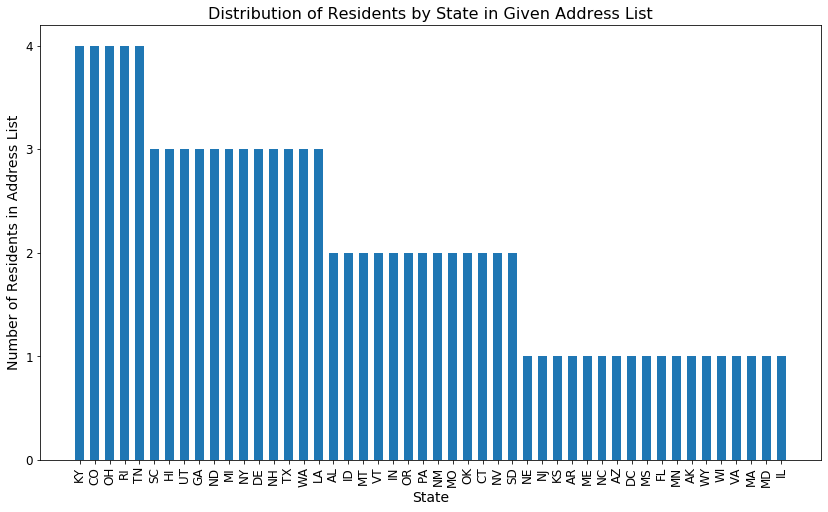

In [63]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure(figsize = (14,8)).gca()
plt.xticks(rotation=90,fontsize=12)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.yticks(fontsize=12)
plt.xlabel('State', fontsize =14)
plt.ylabel('Number of Residents in Address List',fontsize = 14)
plt.title('Distribution of Residents by State in Given Address List', fontsize =16)
plt.bar(*zip(*result),width = 0.6)